In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('C:/Users/satya/Downloads/datasets_74977_169835_StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

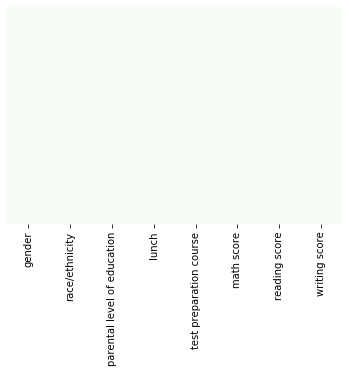

In [5]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='Greens')

In [6]:
df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [7]:
df['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [8]:
df['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

In [9]:
df['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

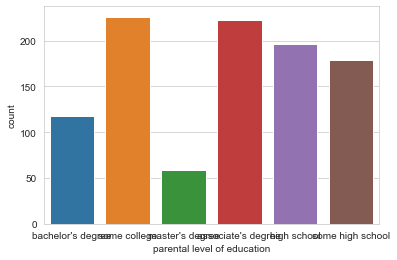

In [10]:
sns.set_style('whitegrid')
sns.countplot('parental level of education',data=df)

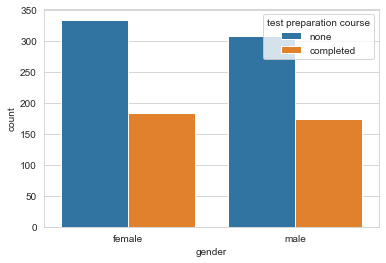

In [11]:
sns.countplot('gender',data=df,hue='test preparation course')

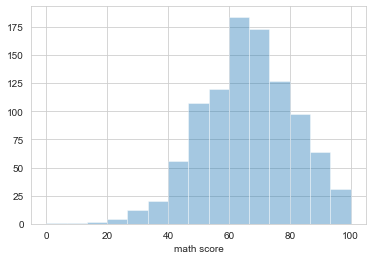

In [12]:
sns.distplot(df['math score'],kde=False,bins=15)

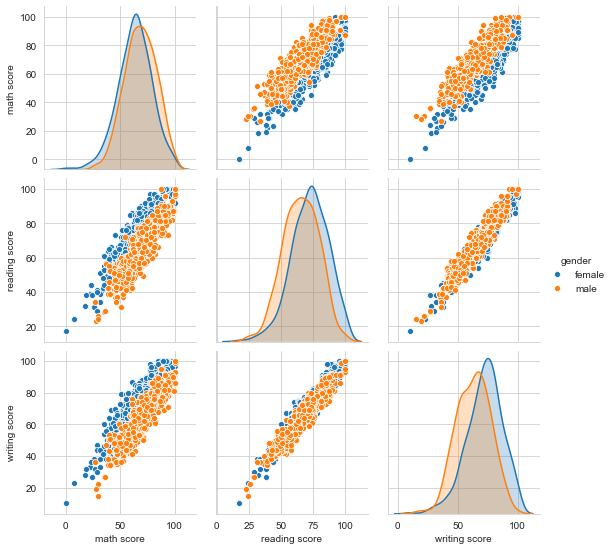

In [13]:
sns.pairplot(df,hue='gender',diag_kind='kde')

### Handling Categorical Features

In [14]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [15]:
gender=pd.get_dummies(df['gender'],drop_first=True)
race=pd.get_dummies(df['race/ethnicity'],drop_first=True)
parent_education=pd.get_dummies(df['parental level of education'],drop_first=True)
lunch=pd.get_dummies(df['lunch'],drop_first=True)
course=pd.get_dummies(df['test preparation course'])

In [16]:
df.drop(['gender','race/ethnicity','parental level of education','lunch','test preparation course'],axis=1,inplace=True)

In [17]:
df=pd.concat([df,gender,race,parent_education,lunch,course],axis=1)

In [18]:
df.head()

,math score,reading score,writing score,male,group B,group C,group D,group E,bachelor's degree,high school,master's degree,some college,some high school,standard,completed,none
0,72,72,74,0,1,0,0,0,1,0,0,0,0,1,0,1
1,69,90,88,0,0,1,0,0,0,0,0,1,0,1,1,0
2,90,95,93,0,1,0,0,0,0,0,1,0,0,1,0,1
3,47,57,44,1,0,0,0,0,0,0,0,0,0,0,0,1
4,76,78,75,1,0,1,0,0,0,0,0,1,0,1,0,1


In [19]:
df.drop(['none'],axis=1,inplace=True)

In [20]:
df.rename(columns={'completed':'course'},inplace=True)

In [21]:
df.head()

,math score,reading score,writing score,male,group B,group C,group D,group E,bachelor's degree,high school,master's degree,some college,some high school,standard,course
0,72,72,74,0,1,0,0,0,1,0,0,0,0,1,0
1,69,90,88,0,0,1,0,0,0,0,0,1,0,1,1
2,90,95,93,0,1,0,0,0,0,0,1,0,0,1,0
3,47,57,44,1,0,0,0,0,0,0,0,0,0,0,0
4,76,78,75,1,0,1,0,0,0,0,0,1,0,1,0


In [22]:
df.shape

(1000, 15)

In [23]:
data=df.drop(['course'],axis=1)
target=df['course']

### Feature Selection

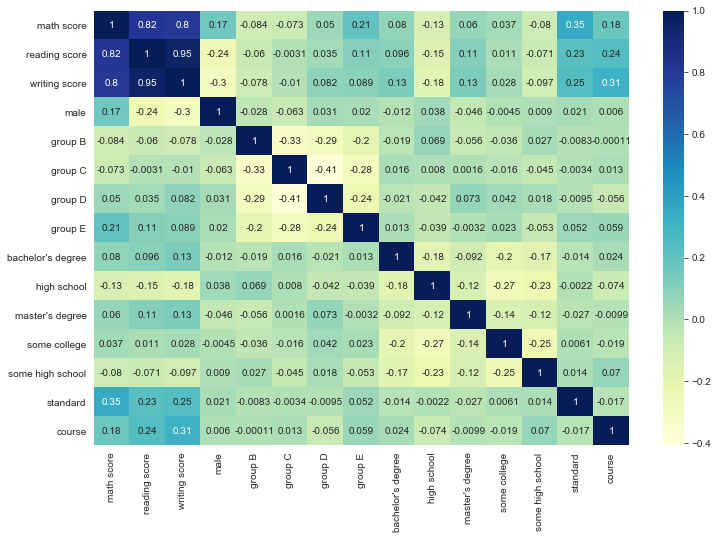

In [24]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')

In [44]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [50]:
best_features=SelectKBest(score_func=chi2,k=10)
fit =best_features.fit(data,target)

In [51]:
Scores=pd.DataFrame(fit.scores_)
Features=pd.DataFrame(data.columns)

In [53]:
featureScores=pd.concat([Features,Scores],axis=1)
featureScores.columns=['Features','Scores']
featureScores

,Features,Scores
0,math score,109.748373
1,reading score,179.975515
2,writing score,331.963546
3,male,0.018822
4,group B,0.000009
5,group C,0.106779
6,group D,2.310735
7,group E,3.033666
8,bachelor's degree,0.520177
9,high school,4.455977


In [54]:
featureScores.nlargest(10,'Scores')

,Features,Scores
2,writing score,331.963546
1,reading score,179.975515
0,math score,109.748373
9,high school,4.455977
12,some high school,4.056201
7,group E,3.033666
6,group D,2.310735
8,bachelor's degree,0.520177
11,some college,0.294024
5,group C,0.106779


In [57]:
filtered_data=df.drop(['male','group B',"master's degree",'standard'],axis=1)
filtered_data.shape

(1000, 11)

In [58]:
X=filtered_data.drop(['course'],axis=1)
Y=filtered_data['course']

### Htperparameter Tuning

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [86]:
c_space = np.logspace(-5, 8, 15) 
c_space

array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08])

In [87]:
params={'C':c_space,
       'max_iter':[0,25,50,75,100]}

In [89]:
from sklearn.model_selection import RandomizedSearchCV

In [90]:
LR_HT=LogisticRegression()

In [91]:
random_search =RandomizedSearchCV(LR_HT,param_distributions=params,n_iter=5,n_jobs=1,scoring='roc_auc',cv=5,verbose=3)

In [92]:
random_search.fit(data,target)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] max_iter=75, C=8.483428982440725e-05 ............................
[CV]  max_iter=75, C=8.483428982440725e-05, score=0.689, total=   0.0s
[CV] max_iter=75, C=8.483428982440725e-05 ............................
[CV]  max_iter=75, C=8.483428982440725e-05, score=0.702, total=   0.0s
[CV] max_iter=75, C=8.483428982440725e-05 ............................
[CV]  max_iter=75, C=8.483428982440725e-05, score=0.694, total=   0.0s
[CV] max_iter=75, C=8.483428982440725e-05 ............................
[CV]  max_iter=75, C=8.483428982440725e-05, score=0.734, total=   0.0s
[CV] max_iter=75, C=8.483428982440725e-05 ............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
c:\software\python3.8\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  max_iter=75, C=8.483428982440725e-05, score=0.639, total=   0.0s
[CV] max_iter=25, C=0.0007196856730011522 ............................
[CV]  max_iter=25, C=0.0007196856730011522, score=0.630, total=   0.0s
[CV] max_iter=25, C=0.0007196856730011522 ............................
[CV]  max_iter=25, C=0.0007196856730011522, score=0.663, total=   0.0s
[CV] max_iter=25, C=0.0007196856730011522 ............................
[CV]  max_iter=25, C=0.0007196856730011522, score=0.637, total=   0.0s
[CV] max_iter=25, C=0.0007196856730011522 ............................
[CV]  max_iter=25, C=0.0007196856730011522, score=0.680, total=   0.0s
[CV] max_iter=25, C=0.0007196856730011522 ............................
[CV]  max_iter=25, C=0.0007196856730011522, score=0.633, total=   0.0s
[CV] max_iter=75, C=0.05179474679231213 ..............................


c:\software\python3.8\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\software\python3.8\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV] .. max_iter=75, C=0.05179474679231213, score=0.782, total=   0.1s
[CV] max_iter=75, C=0.05179474679231213 ..............................
[CV] .. max_iter=75, C=0.05179474679231213, score=0.809, total=   0.1s
[CV] max_iter=75, C=0.05179474679231213 ..............................
[CV] .. max_iter=75, C=0.05179474679231213, score=0.785, total=   0.1s
[CV] max_iter=75, C=0.05179474679231213 ..............................
[CV] .. max_iter=75, C=0.05179474679231213, score=0.809, total=   0.1s
[CV] max_iter=75, C=0.05179474679231213 ..............................


c:\software\python3.8\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\software\python3.8\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV] .. max_iter=75, C=0.05179474679231213, score=0.735, total=   0.1s
[CV] max_iter=0, C=1389495.494373136 .................................
[CV] ..... max_iter=0, C=1389495.494373136, score=0.341, total=   0.0s
[CV] max_iter=0, C=1389495.494373136 .................................
[CV] ..... max_iter=0, C=1389495.494373136, score=0.351, total=   0.0s
[CV] max_iter=0, C=1389495.494373136 .................................
[CV] ..... max_iter=0, C=1389495.494373136, score=0.337, total=   0.0s
[CV] max_iter=0, C=1389495.494373136 .................................
[CV] ..... max_iter=0, C=1389495.494373136, score=0.313, total=   0.0s
[CV] max_iter=0, C=1389495.494373136 .................................
[CV] ..... max_iter=0, C=1389495.494373136, score=0.389, total=   0.0s
[CV] max_iter=50, C=11787686.347935867 ...............................
[CV] ... max_iter=50, C=11787686.347935867, score=0.748, total=   0.0s
[CV] max_iter=50, C=11787686.347935867 ...............................
[CV] .

c:\software\python3.8\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\software\python3.8\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=5, n_jobs=1,
                   param_distributions={'C': arra...05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 

In [93]:
random_search.best_estimator_

LogisticRegression(C=0.05179474679231213, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=75, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [94]:
random_search.best_params_

{'max_iter': 75, 'C': 0.05179474679231213}

In [95]:
LR_A_HT=LogisticRegression(C=0.05179474679231213, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=75, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Cross Validation and PCA

In [110]:
from sklearn.model_selection import StratifiedKFold

In [155]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [128]:
scaler=MinMaxScaler()

In [156]:
sscaler=StandardScaler()

In [163]:
accuracyCV=[]
skf=StratifiedKFold(n_splits=10)
skf.get_n_splits(data,target)
scaler.fit(data)
sscaler.fit(data)
X_all_scaled = sscaler.transform(data)
pca = PCA(n_components=14)
pca.fit(data)
for train_index,test_index in skf.split(data,target):
    X1_train,X1_test=data.iloc[train_index],data.iloc[test_index]
    Y1_train,Y1_test=target.iloc[train_index],target.iloc[test_index]
    
    X_train_scaled = sscaler.transform(X1_train)
    X_test_scaled = sscaler.transform(X1_test)
    
    X_train_pca = pca.transform(X1_train)
    X_test_pca = pca.transform(X1_test)

    LR_A_HT.fit(X_train_pca,Y1_train)
    predict=LR_A_HT.predict(X_test_pca)
    score=accuracy_score(predict,Y1_test)
    accuracyCV.append(score)
    avg_acc=np.array(accuracyCV).mean()*100
print("{}\n\nAverage_accuracy :{}".format(accuracyCV,avg_acc))

[0.77, 0.75, 0.79, 0.77, 0.7, 0.69, 0.71, 0.73, 0.67, 0.71]

Average_accuracy :72.89999999999999


In [164]:
x_train,x_test,y_train,y_test =train_test_split(data,target,random_state=1,test_size=0.3)

In [165]:
#LR=LogisticRegression()
LR_A_HT.fit(x_train,y_train)

c:\software\python3.8\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.05179474679231213, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=75, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [106]:
RF=RandomForestClassifier(max_depth=5)
RF.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [166]:
y_predict_LR=LR_A_HT.predict(x_test)
y_predict_LR

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0], d

In [107]:
y_predict_RF=RF.predict(x_test)
y_predict_RF

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0], d

#### Checking Test data

In [167]:
LR_A_HT.score(x_test,y_test)*100

71.66666666666667

In [108]:
RF.score(x_test,y_test)*100

70.66666666666667

#### Checking Train data

In [101]:
LR_A_HT.score(x_train,y_train)*100

74.14285714285714

In [109]:
RF.score(x_train,y_train)*100

76.14285714285714

In [102]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [169]:
print(classification_report(y_test,y_predict_LR))

              precision    recall  f1-score   support

           0       0.76      0.83      0.79       195
           1       0.61      0.51      0.56       105

    accuracy                           0.72       300
   macro avg       0.69      0.67      0.68       300
weighted avg       0.71      0.72      0.71       300



In [104]:
accuracy =accuracy_score(y_test,y_predict_LR)*100
accuracy

71.66666666666667

In [168]:
confusion_matrix(y_test,y_predict_LR)

array([[161,  34],
       [ 51,  54]], dtype=int64)